# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


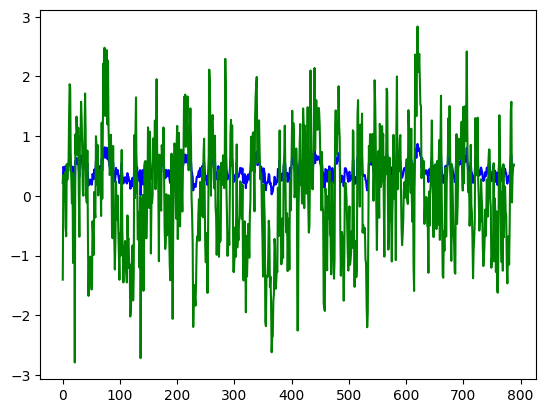

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Aggregations: temperature, precipitation, both 

## temperature

### full data

In [3]:
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'
pd.read_csv(path).columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [8]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated featu

actual training score: 0.3845047780138444
actual validation score: 0.008960906547415992, number of remaining columns: 3

actual training score: 0.39065729289187756
actual validation score: -0.1317424879181459, number of remaining columns: 2

actual training score: 0.39287318578379793
actual validation score: -0.22837972003338125, number of remaining columns: 1

actual training score: 0.40418508325003766
actual validation score: -0.4508211368285584, number of remaining columns: 0

actual training score: 0.40418508325003755
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.404185083250038
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.404185083250038
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.404185083250038
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.40418508325003777
actual validation score: -10000, number of rem

In [9]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.40253407742302827, test score: -0.025602654113695555
Aggregate regression train score with FS: 0.22155610063027276, test score: 0.21328646056561495
Full aggregate regression train score: 0.40253407742302827, test score: -0.025602654113695555
Aggregate regression train score with FS: 0.2443026687830302, test score: 0.25583570224969376


### not considering last years

In [6]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated featu

actual training score: 0.41898819489717043
actual validation score: 0.0884516315480075, number of remaining columns: 6

actual training score: 0.4222182474121654
actual validation score: 0.13634055911124465, number of remaining columns: 5

actual training score: 0.4420792086188501
actual validation score: 0.11538920366345595, number of remaining columns: 4

actual training score: 0.4528522761109466
actual validation score: 0.01679496624970911, number of remaining columns: 3

actual training score: 0.4641528881145557
actual validation score: -0.16928715280633955, number of remaining columns: 2

actual training score: 0.4772959522184005
actual validation score: -0.2750339883183406, number of remaining columns: 1

actual training score: 0.486847064904783
actual validation score: -0.24309918476011516, number of remaining columns: 0

actual training score: 0.4868470649047828
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.48684706490478247
actual va

In [7]:
### forcing a low number of features

target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 4, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated featu

### repeat both with CMI FS

In [10]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated featu

In [11]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated featu

## precipitation

### full data

In [12]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featur

actual training score: 0.3056706160873057
actual validation score: 0.17656411794657412, number of remaining columns: 9

actual training score: 0.312210973576839
actual validation score: 0.12406484402338824, number of remaining columns: 8

actual training score: 0.3206801884211887
actual validation score: 0.07165685979946879, number of remaining columns: 7

actual training score: 0.33951168757224903
actual validation score: -0.005930916776072381, number of remaining columns: 6

actual training score: 0.3520849003195754
actual validation score: -0.0639797689826973, number of remaining columns: 5

actual training score: 0.3566232940458386
actual validation score: -0.1289201638397106, number of remaining columns: 4

actual training score: 0.36758962584634913
actual validation score: -0.17223288180990792, number of remaining columns: 3

actual training score: 0.3685430706469732
actual validation score: -0.1920809552486038, number of remaining columns: 2

actual training score: 0.37063545602

In [13]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.33697510350952975, test score: -0.2837490519017356
Aggregate regression train score with FS: 0.19143393441598677, test score: -0.04811486030390166
Full aggregate regression train score: 0.33697510350952975, test score: -0.2837490519017356
Aggregate regression train score with FS: 0.2379212612915088, test score: -0.0678227284498567


### not considering last years

In [14]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 11

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featu

actual training score: 0.4447341567673939
actual validation score: -0.41672044720449275, number of remaining columns: 0

actual training score: 0.4447341567673938
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673939
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673938
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673939
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673936
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673937
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673938
actual validation score: -10000, number of remaining columns: 0

actual training score: 0.4447341567673938
actual validation score: -10000, number of remaining columns: 0

actual training score: 

In [15]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.3657246245957645, test score: -0.2592461301576978
Aggregate regression train score with FS: 0.19517375279826232, test score: 0.021138185319528713
Full aggregate regression train score: 0.3657246245957645, test score: -0.2592461301576978
Aggregate regression train score with FS: 0.21261822147448417, test score: 0.001408771226251604


### repeating both with CMI FS

In [16]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,[
       'cyclostationary_mean_rr',
       'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featur

In [17]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,[
       'cyclostationary_mean_rr',
       'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 11

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featu

## both

### full data

In [18]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featur

actual training score: 0.3210351841159127
actual validation score: 0.553783071918375, number of remaining columns: 82

actual training score: 0.3325593754409919
actual validation score: 0.5594662185170678, number of remaining columns: 81

actual training score: 0.3325723795344261
actual validation score: 0.5588898538606462, number of remaining columns: 80

actual training score: 0.33441712154078407
actual validation score: 0.5527039803967507, number of remaining columns: 79

actual training score: 0.3361988992316368
actual validation score: 0.5445744792299805, number of remaining columns: 78

actual training score: 0.34158618147346265
actual validation score: 0.5445800269557447, number of remaining columns: 77

actual training score: 0.3571205273818868
actual validation score: 0.5371719562632081, number of remaining columns: 76

actual training score: 0.36392412018625964
actual validation score: 0.5354736723934528, number of remaining columns: 75

actual training score: 0.3647298719010

In [19]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.549634647073485, test score: -1.0736047792403371
Aggregate regression train score with FS: 0.2677232580543544, test score: 0.10576969894668364
Full aggregate regression train score: 0.549634647073485, test score: -1.0736047792403371
Aggregate regression train score with FS: 0.27501421728451503, test score: 0.09098606597811332


### not considering last years

In [20]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w',
                                                                         'cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w'
                                                                        ],
                                                                   target_df_trainVal, 
                                                                   max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 100, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 11

Number of features: 130

Number of aggregated features: 13

Number of features: 130

Number of aggregated featu

actual training score: 0.28002353420369586
actual validation score: 0.3607012265467574, number of remaining columns: 76

actual training score: 0.2801665567347016
actual validation score: 0.3717305574031107, number of remaining columns: 75

actual training score: 0.289990776305592
actual validation score: 0.3700397426252079, number of remaining columns: 74

actual training score: 0.29418680687562226
actual validation score: 0.3475157123149454, number of remaining columns: 73

actual training score: 0.3084786329367305
actual validation score: 0.32998163010985293, number of remaining columns: 72

actual training score: 0.3103266525854025
actual validation score: 0.3222212137748448, number of remaining columns: 71

actual training score: 0.3116205553530482
actual validation score: 0.3109451634080639, number of remaining columns: 70

actual training score: 0.3175026821954987
actual validation score: 0.2951139246817627, number of remaining columns: 69

actual training score: 0.3186336062949

In [21]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.5575108271891955, test score: -0.45791396299851783
Aggregate regression train score with FS: 0.26179941928927786, test score: 0.2084077826152424
Full aggregate regression train score: 0.5575108271891955, test score: -0.45791396299851783
Aggregate regression train score with FS: 0.28569160493690526, test score: 0.29636746647914813


### repeating both with CMI FS

In [22]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,20,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 8

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated featur

CMI: 0.04410701981536369
CMI: 0.04787781886256984
CMI: 0.05096048224176941
CMI: 0.05590843527772882
CMI: 0.038000088980450236
CMI: 0.033769498623289346
CMI: 0.05936848606234846
CMI: 0.05026387677025873
CMI: 0.037338807782587136
CMI: 0.038973142742427386
CMI: 0.03330199225177091
CMI: 0.0411681875179013
CMI: 0.03740612594133752
CMI: 0.03928137275248944
CMI: 0.05422120297090491
CMI: 0.04110886765860425
CMI: 0.016245570657079433
CMI: 0.01052611870726819
CMI: 0.021383198933347475
CMI: 0.017512908237345665
CMI: 0.02852554795745485
CMI: 0.05989859261988445
CMI: 0.042505037779070914
CMI: 0.014690837036286208
CMI: 0.011459602882793352
CMI: 0.02199544773046705
CMI: 0.02172640171234319
CMI: 0.024229421853614902
CMI: 0.026156893036407364
CMI: 0.02193893620668025
CMI: 0.01639423665769757
Highest CMI score: 0.08074178082299746
Adding original feature: 91
CMI: 0.0001474911207938745
CMI: 0.0016098318819111335
CMI: 0.001756484949856113
CMI: 0.0012848438047406707
CMI: 0.0020798483122831946
CMI: 0.001439

In [23]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated features: 10

Number of features: 130

Number of aggregated features: 12

Number of features: 130

Number of aggregated featu

CMI: 0.007602879893182757
CMI: 0.0024002917713436267
CMI: 0.0007265248807216962
CMI: 0.00245901741431101
CMI: 0.0031829462399128594
CMI: 0.0031770491316495675
CMI: 0.002520771836884872
CMI: 0.020217173897299545
Highest CMI score: 0.020217173897299545
Adding original feature: 132
CMI: 0.0004169143163545441
CMI: 0.003520863402114466
CMI: 0.006181525095180163
CMI: 0.0015478503830835544
CMI: 0.0025326181191131225
CMI: 0.00033690664940630444
CMI: 0.0019382483138140338
CMI: 0.004879188766468756
CMI: 0.0015707823475623883
CMI: 0.003604766279066529
CMI: 0.02082452284172151
CMI: 0.023408072487352882
CMI: 0.02290067448098604
CMI: 0.023388729496363864
CMI: 0.017614682352147193
CMI: 0.0044187204799884805
CMI: 0.007238384631311545
CMI: 0.004892050806602016
CMI: 0.01576904566903653
CMI: 0.004818395438836609
CMI: 0.0010672975568009335
CMI: 0.00435784601689021
CMI: 0.0009098299849528424
CMI: 0.002581704067407764
CMI: 0.005233928552568073
CMI: 0.0018212548057564837
CMI: 0.0009402609426233666
CMI: 0.002